In [1]:
import pandas as pd
df = pd.read_csv("iris.csv",encoding = "big5")
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Gini

In [2]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_depth=5)
tree.fit(df[['花萼長度','花萼寬度','花瓣長度','花瓣寬度']], df[['屬種']])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [3]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['花萼長度','花萼寬度','花瓣長度','花瓣寬度'],
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],)

In [4]:
!dot -Tpng tree.dot -o tree.png

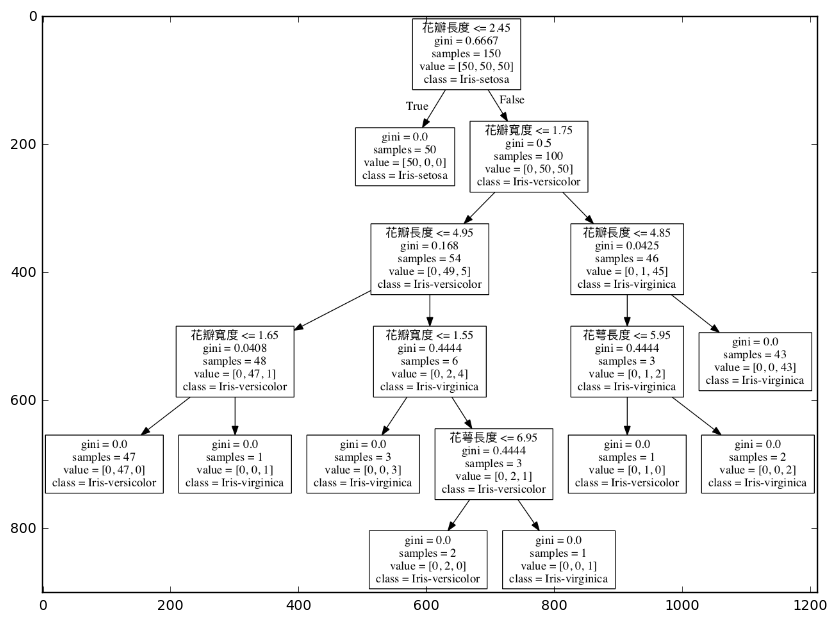

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img = mpimg.imread('tree.png')
fig = plt.figure(figsize=(10,8))
plt.imshow(img)

In [6]:
tree.feature_importances_.tolist()
df = pd.DataFrame({'feature':['花萼長度','花萼寬度','花瓣長度','花瓣寬度'],'feature_importance':tree.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df

,feature,feature_importance
0,花瓣長度,0.550723
1,花瓣寬度,0.422611
2,花萼長度,0.026667
3,花萼寬度,0.000000


In [7]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%f'%float(height),
                ha='center', va='bottom')

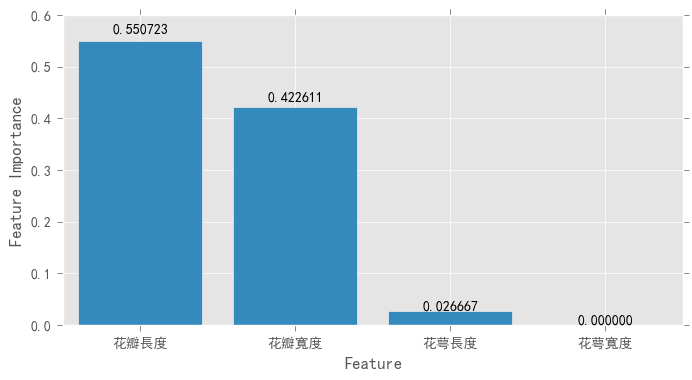

In [8]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(8,4))


#中文字體 font = matplotlib.font_manager.FontProperties(fname='wt011.ttf')
plt.rcParams['font.family']='SimHei'

gini = plt.bar(df.index,df['feature_importance'],align='center')
plt.xlabel('Feature') #X軸名稱
plt.ylabel('Feature Importance') #Y軸名稱
plt.xticks(df.index, df['feature']) #X軸項目名稱

autolabel(gini)
#for i in range(len(df.index)):
#    plt.annotate(round(df['gini_importance'][i],3),xy=(df.index[i],df['gini_importance'][i]),
#             xytext=(df.index[i],df['gini_importance'][i]))

plt.show()

## Entrpoy

In [9]:
import pandas as pd
df = pd.read_csv("iris.csv",encoding = "big5")
df.head()

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
tree.fit(df[['花萼長度','花萼寬度','花瓣長度','花瓣寬度']], df[['屬種']])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_en.dot", feature_names=['花萼長度','花萼寬度','花瓣長度','花瓣寬度'],
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],)

In [12]:
!dot -Tpng tree_en.dot -o tree_en.png

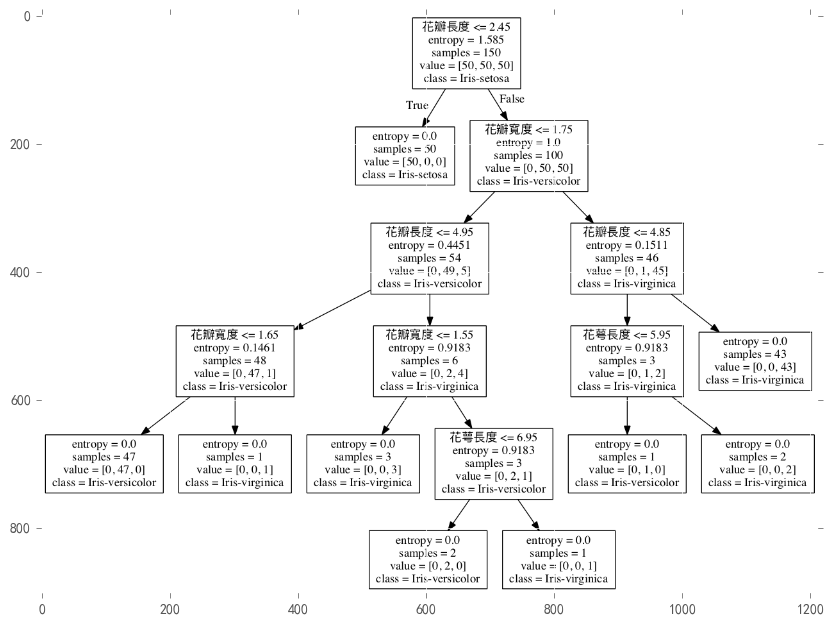

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img = mpimg.imread('tree_en.png')
fig = plt.figure(figsize=(10,8))
plt.imshow(img)

In [14]:
tree.feature_importances_.tolist()
df = pd.DataFrame({'feature':['花萼長度','花萼寬度','花瓣長度','花瓣寬度'],'feature_importance':tree.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df

,feature,feature_importance
0,花瓣長度,0.645446
1,花瓣寬度,0.331379
2,花萼長度,0.023175
3,花萼寬度,0.000000


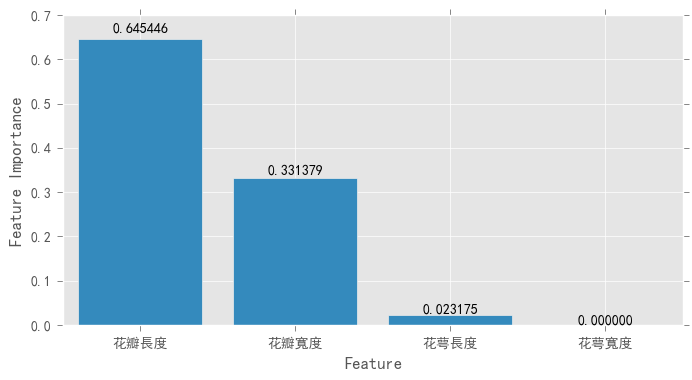

In [15]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(8,4))


#中文字體 font = matplotlib.font_manager.FontProperties(fname='wt011.ttf')
plt.rcParams['font.family']='SimHei'

gini = plt.bar(df.index,df['feature_importance'],align='center')
plt.xlabel('Feature') #X軸名稱
plt.ylabel('Feature Importance') #Y軸名稱
plt.xticks(df.index, df['feature']) #X軸項目名稱

autolabel(gini)
#for i in range(len(df.index)):
#    plt.annotate(round(df['gini_importance'][i],3),xy=(df.index[i],df['gini_importance'][i]),
#             xytext=(df.index[i],df['gini_importance'][i]))

plt.show()